# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
#pip install citipy 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | crane
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | ak'ordat
Processing Record 6 of Set 1 | zaysan
Processing Record 7 of Set 1 | jiwani
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | al ghayzah
Processing Record 11 of Set 1 | vila franca do campo
Processing Record 12 of Set 1 | portland
Processing Record 13 of Set 1 | kristiansund
Processing Record 14 of Set 1 | guerrero negro
Processing Record 15 of Set 1 | conselheiro pena
Processing Record 16 of Set 1 | thames
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | arrifes
Processing Record 20 of Set 1 | luganville
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | adamstown
Proc

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0  port-aux-francais -49.3500   70.2167      4.71        88         100   
1        yellowknife  62.4560 -114.3525     -5.71        93          75   
2              crane  31.3974 -102.3501     12.16        56          64   
3              pisco -13.7000  -76.2167     18.03        88         100   
4           ak'ordat  15.5486   37.8867     35.46        21           0   

   Wind Speed Country        Date  
0        9.61      TF  1730985591  
1        6.69      CA  1730985592  
2        6.45      US  1730985593  
3        4.63      PE  1730985594  
4        2.99      ER  1730985595

In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
0        port-aux-francais -49.3500   70.2167      4.71        88         100   
1              yellowknife  62.4560 -114.3525     -5.71        93          75   
2                    crane  31.3974 -102.3501     12.16        56          64   
3                    pisco -13.7000  -76.2167     18.03        88         100   
4                 ak'ordat  15.5486   37.8867     35.46        21           0   

         Wind Speed Country        Date  
City_ID                                  
0              9.61      TF  1730985591  
1              6.69      CA  1730985592  
2              6.45      US  1730985593  
3              4.63      PE  1730985594  
4              2.99      ER  1730985595

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

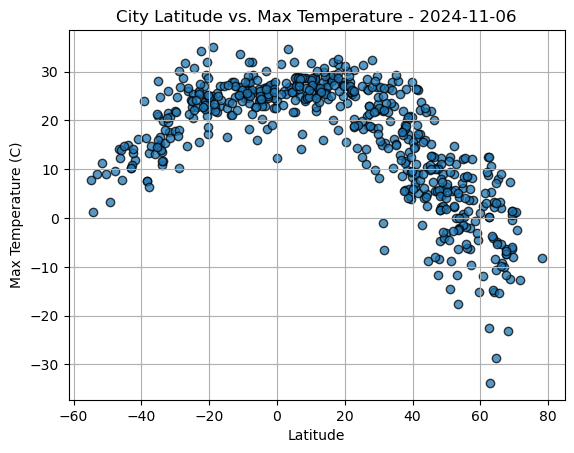

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=.75, edgecolors='black')

current_date = datetime.date.today()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature - {current_date}") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude refers to a location's position north or south of the equator, measured in degrees, while temperature indicates how hot or cold a place is, and is directly influenced by latitude; generally, locations closer to the equator (lower latitudes) experience warmer temperatures, while those closer to the poles (higher latitudes) have colder temperatures due to the angle at which sunlight hits the Earth at different latitudes.

#### Latitude Vs. Humidity

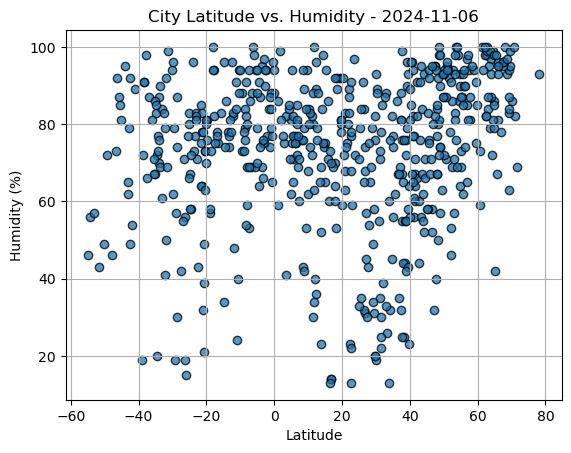

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity - {current_date}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Humidity and latitude are not strongly correlated, but there are some patterns that can be observed:
Specific humidity
The amount of water vapor in the air is highest in the tropics and decreases as you move toward the poles. In fact, the air in the driest desert regions (around 30° N or S latitude) contains more water vapor than temperate regions farther north. 

#### Latitude Vs. Cloudiness

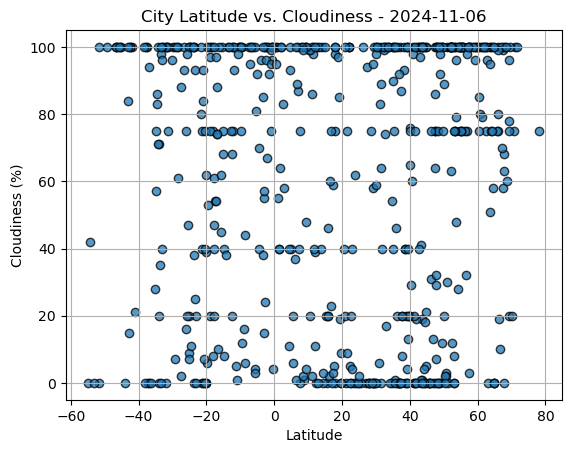

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness - {current_date}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### There is little to no correlation between latitude and cloudiness. Latitude is a measurement of a location's north or south position on Earth, while cloudiness is the amount of clouds covering the sky: 
### Latitude
### A coordinate that measures a location's north-south position on Earth. Latitude lines run parallel to the equator, starting at 0° latitude at the equator and increasing to 90° at the North and South poles. 

#### Latitude vs. Wind Speed Plot

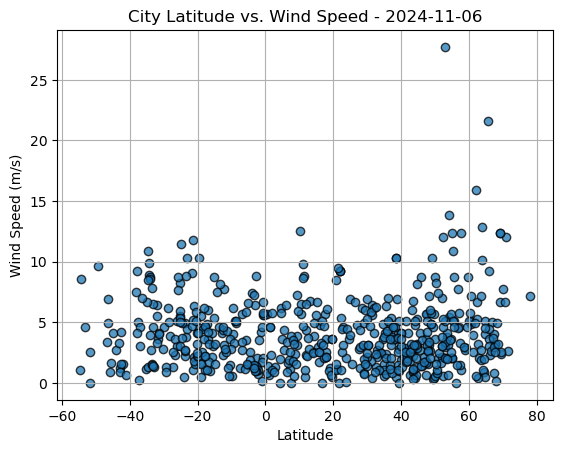

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed - {current_date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


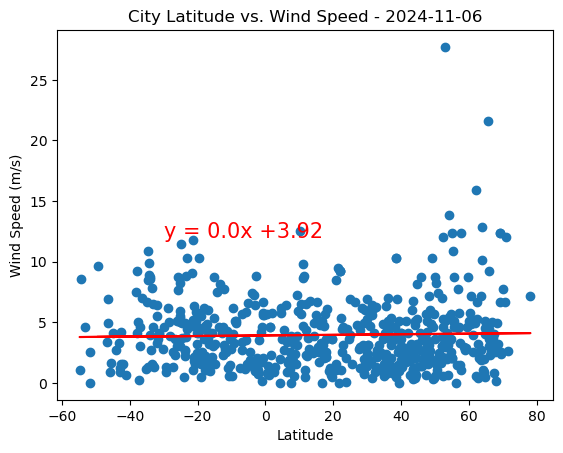

R-value: 0.02722924055400314


In [44]:
# Define a function to create Linear Regression plots

def linreg_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    f, ax = plt.subplots()
    ax.scatter(x,y)
    ax.plot(x, regress_values, 'red')
    
    return ax, line_eq, rvalue
    
ax, line_eq, rvalue =linreg_plot(city_data_df['Lat'], city_data_df['Wind Speed'])
ax.plot()
plt.annotate(line_eq,(-30,12),fontsize=15,color="red")
plt.title(f"City Latitude vs. Wind Speed - {current_date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()
print(f"R-value: {rvalue}")

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
1        yellowknife  62.4560 -114.3525     -5.71        93          75   
2              crane  31.3974 -102.3501     12.16        56          64   
4           ak'ordat  15.5486   37.8867     35.46        21           0   
5             zaysan  47.4667   84.8667      2.12        60          86   
6             jiwani  25.0500   61.7417     27.91        75           0   

         Wind Speed Country        Date  
City_ID                                  
1              6.69      CA  1730985592  
2              6.45      US  1730985593  
4              2.99      ER  1730985595  
5              1.83      KZ  1730985597  
6              6.94      PK  1730985598

In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
0        port-aux-francais -49.3500   70.2167      4.71        88         100   
3                    pisco -13.7000  -76.2167     18.03        88         100   
8                grytviken -54.2811  -36.5092      0.44        87          42   
14        conselheiro pena -19.1722  -41.4722     25.54        72         100   
15                  thames -37.1333  175.5333     12.55        95           0   

         Wind Speed Country        Date  
City_ID                                  
0              9.61      TF  1730985591  
3              4.63      PE  1730985594  
8              8.55      GS  1730985600  
14             1.68      BR  1730985606  
15             0.26      NZ  1730985607

###  Temperature vs. Latitude Linear Regression Plot

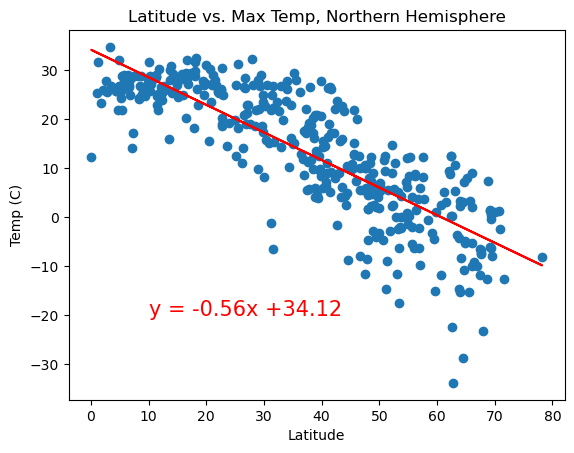

R-value: -0.8274120620859209


In [17]:
# Linear regression on Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
ax.plot()
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.title("Latitude vs. Max Temp, Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Temp (C)')
plt.show()
print(f"R-value: {rvalue}")

### A "temperature vs. latitude linear regression" refers to a statistical analysis where the dependent variable is temperature and the independent variable is latitude, using a linear regression model to identify the trend of decreasing temperature as latitude increases, meaning generally, the further away from the equator (higher latitude), the colder the temperature will be; this is because of the angle at which sunlight hits the Earth at different latitudes.

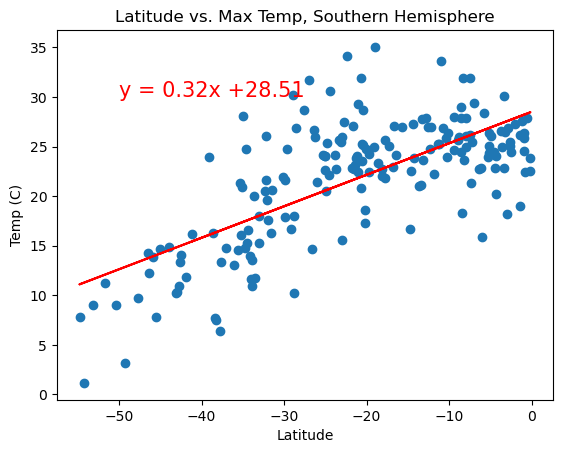

R-value: 0.6998929774341386


In [18]:
# Linear regression on Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
ax.plot()
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title('Latitude vs. Max Temp, Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temp (C)')
plt.show()
print(f"R-value: {rvalue}")

## Discussion about the linear relationship:  
### The relationship between latitude and temperature is much stronger in the northern than southern hemishpere, as seen in the tightness of the scatterplot points and will as the R squared values. However the trend is the same for both; the further from the equator, the colder the temperature.

### Humidity vs. Latitude Linear Regression Plot

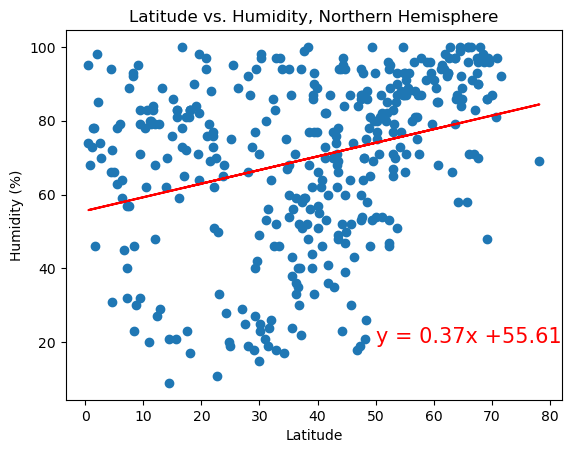

R-value: 0.30231425316111066


In [47]:
# Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
ax.plot()
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title('Latitude vs. Humidity, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
print(f"R-value: {rvalue}")

### The correlation between humidity and latitude is generally weak and negative for both the northern and southern hemispheres. This means that humidity is fairly evenly distributed across cities in both hemispheres, regardless of their distance from the equator. However, there is some correlation at higher latitudes in the northern hemisphere. 

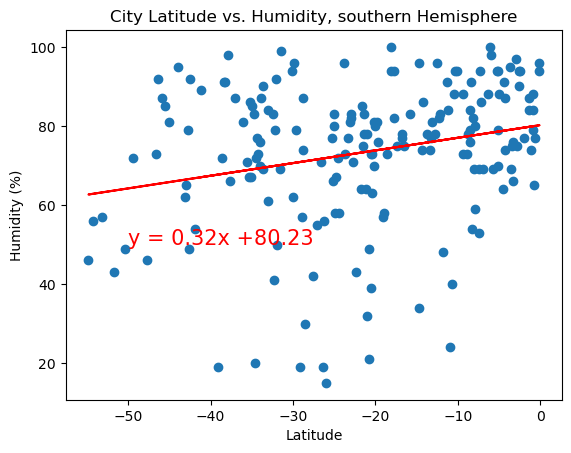

R-value: 0.24403180466691043


In [20]:
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
ax.plot()
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.title('City Latitude vs. Humidity, southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** The relationship between latitude and humidity appears stronger in the northern hemisphere based on the R value, but I'm not convinenced a linear regression is the best way to model this. 

### Cloudiness vs. Latitude Linear Regression Plot

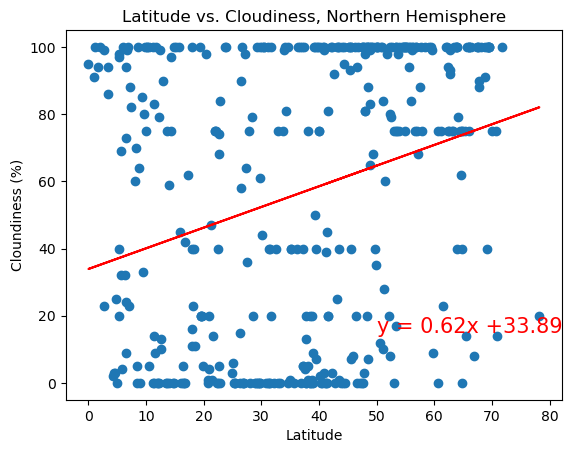

R-value: 0.2870003388338522


In [21]:
# Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
ax.plot()
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.title('Latitude vs. Cloudiness, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloundiness (%)')
plt.show()
print(f"R-value: {rvalue}")

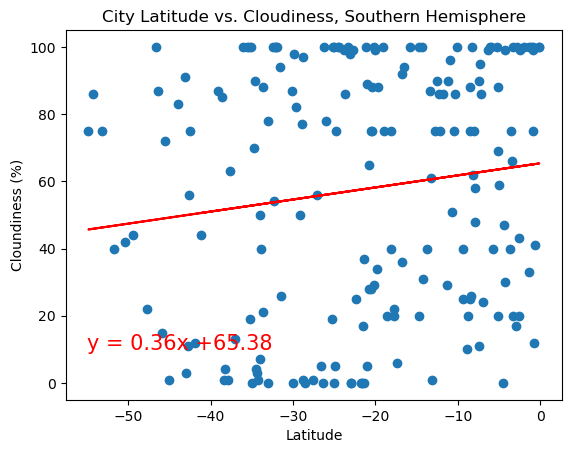

R-value: 0.13634051058194796


In [22]:
# Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
ax.plot()
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title('City Latitude vs. Cloudiness, Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloundiness (%)')
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** The relationship between latitude and cloud cover is not very strong, but it is surprisingly similar for both hemishperes. The regressions indicate a one degree latitude change is related to roughly 0.5% change in cloud cover on average.

### Wind Speed vs. Latitude Linear Regression Plot

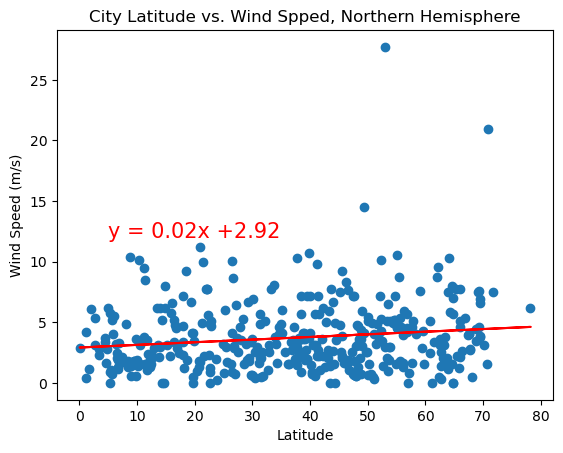

R-value: 0.1443267248508013


In [23]:
# Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
ax.plot()
plt.annotate(line_eq,(5,12),fontsize=15,color="red")
plt.title('City Latitude vs. Wind Spped, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()
print(f"R-value: {rvalue}")

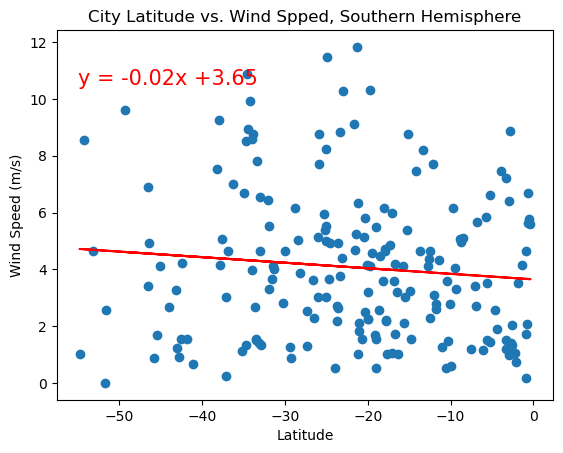

R-value: -0.10008544312626871


In [50]:
# Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
ax.plot()
plt.annotate(line_eq,(-55,10.5),fontsize=15,color="red")
plt.title('City Latitude vs. Wind Spped, Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** 
## Wind speed and latitude
Wind speeds are generally lower near the equator and faster in mid-latitudes. For example, the average wind speed in the interiors of South America and Africa near the equator is about 2 meters per second (5 miles per hour), while in the Roaring Forties it's about 11 meters per second (25 miles per hour).
There is no (linear) relationship between latitude and wind speed. For both hemisphere the slope coefficients and r-values are near zero.